## `CIFAR10` Image Classification Challenge (Version 0.3.2) Dataset Preparation

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
try:
  %tensorflow_version 2.x
except:
  pass

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as tf_hub

TensorFlow 2.x selected.


In [0]:
from matplotlib import pyplot as plt
from matplotlib import style
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import glob
import logging
import math
import numpy as np
import os
import pandas as pd
import shutil
import urllib3

In [0]:
logger = tf.get_logger()

In [0]:
logger.setLevel(level=logging.ERROR)
style.use('ggplot')
tfds.disable_progress_bar()
urllib3.disable_warnings(category=urllib3.exceptions.InsecureRequestWarning)

In [7]:
URL = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

fname = URL.split('/')[-1]
fname

'cifar-10-python.tar.gz'

In [8]:
zip_file_here = tf.keras.utils.get_file(fname=fname, origin=URL, extract=True)
zip_file_here

170500096/170498071 [==============================] - 11s 0us/step


'/root/.keras/datasets/cifar-10-python.tar.gz'

In [9]:
r_path_datasets = os.path.dirname(zip_file_here)
r_path_datasets

'/root/.keras/datasets'

In [10]:
!ls $r_path_datasets

cifar-10-batches-py  cifar-10-python.tar.gz


In [11]:
base_dir = os.path.join(r_path_datasets, 'cifar-10-batches-py')
base_dir

'/root/.keras/datasets/cifar-10-batches-py'

In [12]:
!ls {base_dir}

batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch


In [13]:
base_dir_batch_files = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5', 'test_batch']
train_batch_files = base_dir_batch_files[:-1]
test_batch_files = [base_dir_batch_files[-1]]

print(train_batch_files)
print(test_batch_files)

['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']
['test_batch']


In [0]:
def unpickling_batch_files(pkl_filename):
  import pickle
  with open(file=pkl_filename, mode='rb') as batch_file:
    data_dict = pickle.load(batch_file, encoding='bytes')
  return data_dict

In [0]:
data_dict_list = list([])

for data_batch_file_tr in train_batch_files:
  data_dict_list.append(unpickling_batch_files(pkl_filename=os.path.join(base_dir, data_batch_file_tr)))

In [16]:
print(len(data_dict_list))

5


In [0]:
def dataset_preparation(data_dict_list, image_shape=(32, 32, 3), thres=32):
  whole_dataset = list()
  for data_dict in data_dict_list:
    label_list = data_dict[b'labels'] # 10000 labels
    image_data = data_dict[b'data'] # 10000 images

    for image, label in zip(image_data, label_list):
      image_r = image[:thres**2]
      image_g = image[thres**2:(thres**2)*2]
      image_b = image[(thres**2)*2:]

      image_reshape = np.array([], dtype=np.int32)
      for pixel in range(len(image)//3):
        image_reshape = np.append(arr=image_reshape, values=[image_r[pixel], image_g[pixel], image_b[pixel]])
      image_reshape = image_reshape.reshape(image_shape)
      
      whole_dataset.append((image_reshape, label))
  return whole_dataset

In [0]:
training_dataset = dataset_preparation(data_dict_list=[data_dict_list[0]])

In [19]:
len(training_dataset)

10000

In [20]:
splitting = 2000

training_splitted = np.array(training_dataset[:-splitting])
validation_splitted = np.array(training_dataset[-splitting:])

print(len(training_splitted))
print(len(validation_splitted))

8000
2000


In [0]:
in_range = 1

for train_img, train_lab in training_splitted[-2*in_range:]:
  break

In [22]:
print(train_img)
print(train_img.shape)
print(train_lab)

[[[50 65 42]
  [53 66 44]
  [61 72 51]
  ...
  [62 76 43]
  [60 73 42]
  [59 72 44]]

 [[46 61 43]
  [61 71 54]
  [74 78 62]
  ...
  [62 77 44]
  [62 75 45]
  [57 69 43]]

 [[61 74 57]
  [61 74 53]
  [71 84 58]
  ...
  [61 74 48]
  [64 75 50]
  [58 66 43]]

 ...

 [[40 57 38]
  [34 51 30]
  [36 53 30]
  ...
  [40 59 35]
  [30 53 27]
  [37 59 33]]

 [[31 52 30]
  [32 54 28]
  [29 50 28]
  ...
  [38 48 30]
  [33 45 26]
  [32 47 27]]

 [[28 44 25]
  [33 50 30]
  [31 47 30]
  ...
  [37 49 32]
  [42 50 34]
  [38 49 32]]]
(32, 32, 3)
0


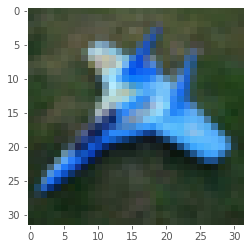

In [23]:
plt.imshow(train_img)
plt.grid(False)
plt.show()

In [0]:
in_range = 1

for valid_img, valid_lab in validation_splitted[-2*in_range:]:
  break

In [25]:
print(valid_img)
print(valid_img.shape)
print(valid_lab)

[[[250 255 255]
  [254 253 254]
  [211 224 220]
  ...
  [188 195 193]
  [255 255 255]
  [255 254 255]]

 [[250 255 255]
  [255 254 255]
  [213 225 222]
  ...
  [189 198 195]
  [255 255 255]
  [255 254 255]]

 [[250 255 255]
  [255 254 255]
  [213 226 222]
  ...
  [186 198 194]
  [255 255 255]
  [255 254 255]]

 ...

 [[255 254 255]
  [254 254 255]
  [213 224 221]
  ...
  [211 211 215]
  [255 255 255]
  [255 254 254]]

 [[255 254 255]
  [252 253 253]
  [217 225 222]
  ...
  [214 213 216]
  [255 255 255]
  [255 254 254]]

 [[255 254 255]
  [253 253 253]
  [218 221 220]
  ...
  [214 212 215]
  [255 255 255]
  [255 254 254]]]
(32, 32, 3)
1


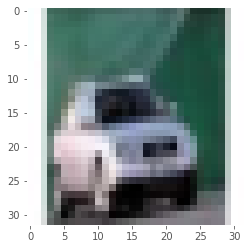

In [26]:
plt.imshow(valid_img)
plt.grid(False)
plt.show()

In [0]:
batch_size = 20

In [0]:
in_range = 1

for train_img, train_lab in training_splitted[20*in_range:]:
  break

[[[153 157 155]
  [174 180 188]
  [155 165 172]
  ...
  [122 125 123]
  [138 143 141]
  [ 97 101  97]]

 [[160 163 165]
  [164 170 180]
  [150 159 169]
  ...
  [137 135 129]
  [160 161 157]
  [103 109 107]]

 [[140 143 147]
  [147 152 166]
  [136 145 158]
  ...
  [104 103  99]
  [125 128 125]
  [ 93 102 101]]

 ...

 [[175 177 179]
  [170 172 174]
  [170 172 174]
  ...
  [193 203 212]
  [197 206 214]
  [199 204 213]]

 [[174 177 181]
  [173 176 180]
  [171 174 178]
  ...
  [200 208 216]
  [202 209 218]
  [208 212 221]]

 [[168 173 180]
  [164 169 175]
  [166 171 177]
  ...
  [204 209 217]
  [204 208 217]
  [206 210 219]]]


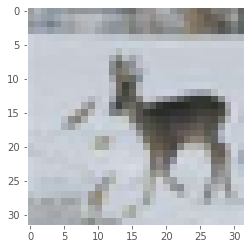

In [29]:
print(train_img)
plt.imshow(train_img)
plt.grid(False)
plt.show()

In [30]:
class_labels = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 
                         'dog', 'frog', 'horse', 'ship', 'truck'])
print(class_labels)

['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']


In [0]:
batched_training = list([])
batched_validation = list([])

In [0]:
train_batching = np.array_split(ary=training_splitted, 
                                indices_or_sections=len(training_splitted)//batch_size)

In [33]:
print(len(train_batching))

400


In [0]:
for batch_of_train in train_batching:
  features = []
  labels = []
  for pack in batch_of_train:
    features.append(pack[0])
    labels.append(pack[1])
  batched_training.append((features, labels))

In [35]:
print(type(batched_training[0]))

<class 'tuple'>


In [0]:
for batch_of_input in batched_training:
  break

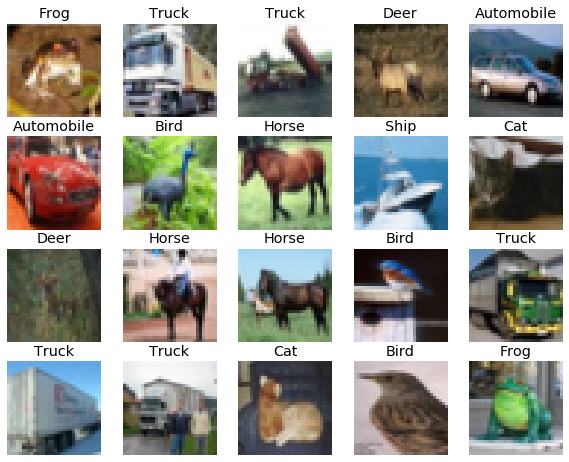

In [37]:
plt.figure(figsize=(10, 10))
j = 0
for i in range(len(batch_of_input[0])):
  plt.subplot(5, 5, j+1)
  plt.imshow(batch_of_input[0][i])
  plt.title(class_labels[batch_of_input[1][i]].title())
  plt.grid(False)
  plt.axis('off')
  j += 1

plt.show()